In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('../../data/003/Admission_predict_Ver1.1.csv')

In [10]:
data.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [4]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
target=data['Chance of Admit ']
data.drop(['Serial No.','Chance of Admit '],axis=1,inplace=True)

<Axes: >

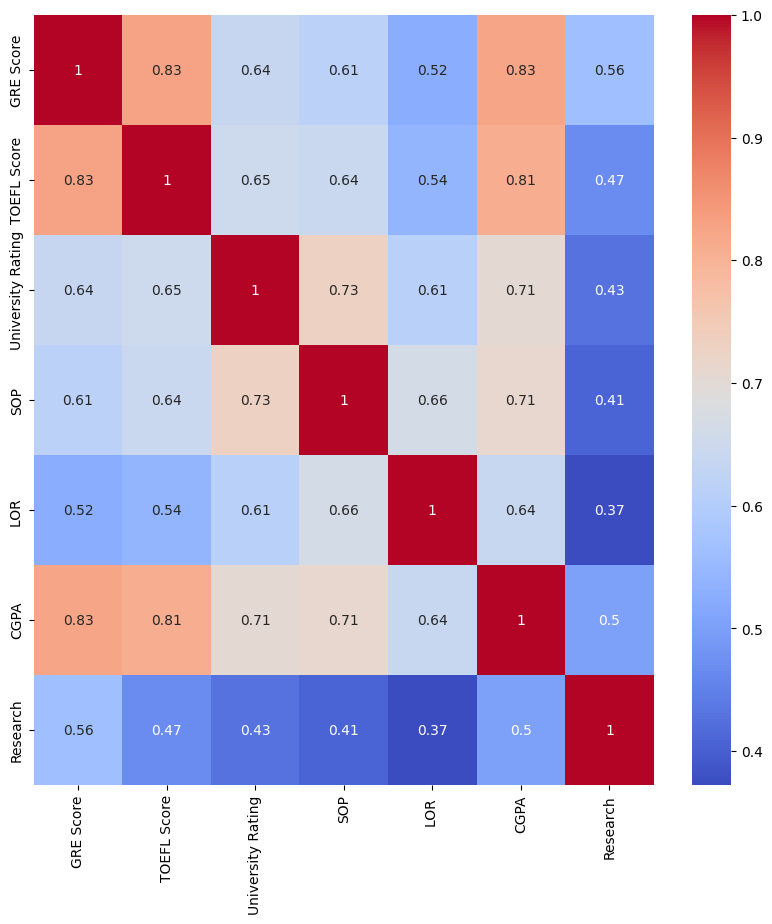

In [11]:
corr_mat=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat,cmap='coolwarm',annot=True)

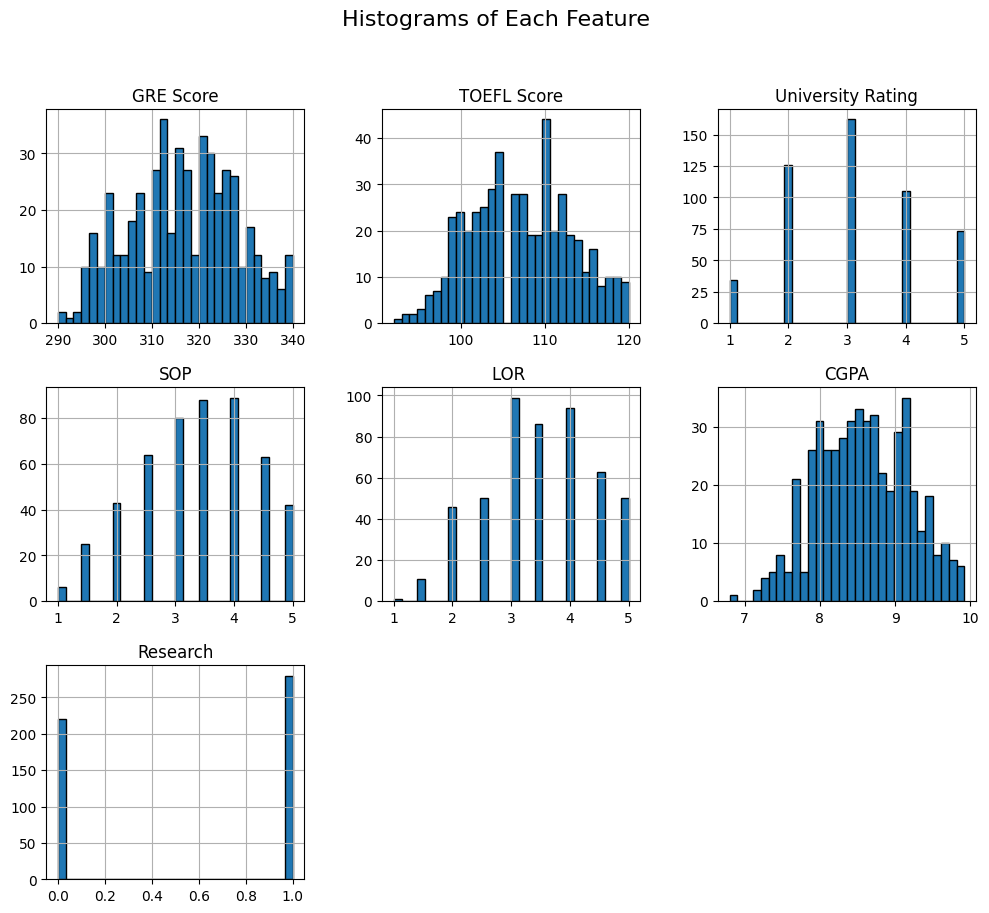

In [12]:
data.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle('Histograms of Each Feature', fontsize=16)
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
data1=pd.DataFrame(scaler.fit_transform(data),columns=data.columns)
data1.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(data1,target,test_size=0.2,random_state=42)


In [23]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (400, 7)
X_test: (100, 7)
y_train: (400,)
y_test: (100,)


In [29]:
y_test

361    0.93
73     0.84
374    0.39
155    0.77
104    0.74
       ... 
347    0.42
86     0.72
75     0.72
438    0.67
15     0.54
Name: Chance of Admit , Length: 100, dtype: float64

In [30]:
from sklearn.ensemble import RandomForestRegressor 
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)


In [36]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, explained_variance_score

In [38]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

# Output all metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")
print(f"Explained Variance Score (EVS): {evs}")

Mean Absolute Error (MAE): 0.043655000000000006
Mean Squared Error (MSE): 0.004162580300000002
Root Mean Squared Error (RMSE): 0.06451806181217785
R-squared (R²): 0.7964508410757946
Mean Absolute Percentage Error (MAPE): 7.02%
Explained Variance Score (EVS): 0.7968449692420536


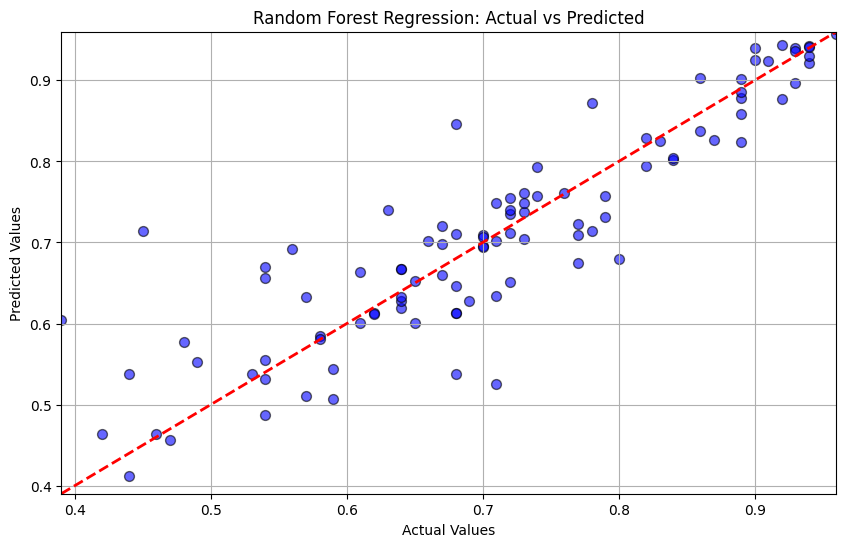

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolors='k', s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Ideal line
plt.title('Random Forest Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.show()

In [43]:
importances = rfr.feature_importances_
importances

array([0.13448212, 0.03827035, 0.01336967, 0.02603424, 0.02529017,
       0.7506072 , 0.01194625])

In [44]:
print(np.argmax(importances))

5


In [45]:
data1.columns[5]

'CGPA'

the most important feature in the student admision is CGPA score

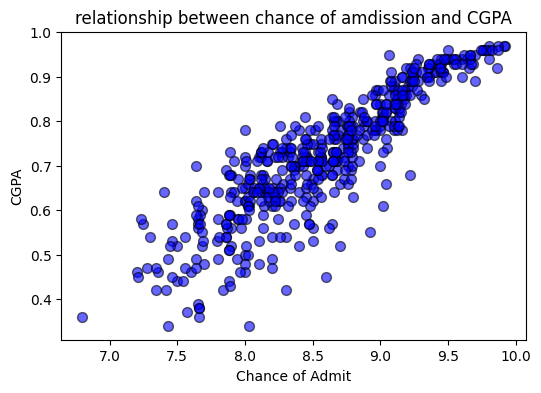

In [48]:
plt.figure(figsize=(6,4))
plt.scatter(data['CGPA'],target, color='blue', alpha=0.6, edgecolors='k', s=50)
plt.ylabel('CGPA')
plt.xlabel('Chance of Admit')
plt.title("relationship between chance of amdission and CGPA")
plt.show()